### Processing the json files

In [25]:
import json

import matplotlib.pyplot as plt
import numpy as np


test_filename = '13911806/20241003_enamdisc_neg_ms2.json'


# open_ms_file
# Takes in: filename (name of .json ms file to open)
# Outputs:  The dictionary version of the json file
# Also:     NA
def open_ms_file(filename):
    file1 = open(filename,'r')

    spectra = []

    for line in file1:
        spectra.append(json.loads(line))


    # this loop is making the intensities percentages
    for spectrum in spectra:
        intensities = []   
        for peak in spectrum['peaks']:
            intensities.append(peak[1])
        spectrum['max_intensity'] = max(intensities)
        for peak in spectrum['peaks']:
            peak[1] = round(peak[1] / spectrum['max_intensity'] * 100, 3)
    # end data processing
    return spectra

test_spectra = open_ms_file(test_filename)

print(test_spectra[0]['max_intensity'])

print(test_spectra[0]['peaks'])

548053500.0
[[41.998386, 7.528], [47.012128, 0.057], [50.003493, 0.12], [52.019158, 0.081], [63.011478, 0.042], [64.01921, 0.125], [64.774982, 0.053], [65.026867, 0.205], [67.006332, 0.041], [68.014162, 0.063], [72.032089, 0.069], [72.036254, 0.085], [78.034905, 0.358], [81.02201, 0.035], [88.019321, 0.064], [89.027164, 0.072], [90.034944, 0.528], [92.014269, 0.098], [93.02206, 0.112], [103.030235, 0.089], [104.038093, 0.225], [105.022153, 0.09], [105.045982, 0.042], [106.029966, 0.093], [107.025025, 0.187], [115.030261, 0.05], [117.045955, 0.43], [118.029975, 0.046], [119.025188, 0.077], [131.025187, 1.225], [132.032991, 26.01], [132.03688, 0.5], [132.039262, 0.263], [132.043243, 0.124], [133.02658, 0.039], [133.029937, 0.045], [133.033248, 0.132], [133.036481, 0.362], [133.038665, 0.353], [133.040724, 56.034], [133.044614, 0.971], [133.048598, 0.27], [133.052485, 0.326], [133.058342, 0.386], [133.063812, 0.181], [135.019888, 0.399], [143.025162, 0.078], [145.040775, 1.224], [146.0358

### Byte-Pair Encoding Algorithm

In [3]:
# encodeSpectraDict
# Takes in: spectra  (list of spectra to encode)
#           peak_bin (how to round the peak values for binning)
#           int_bin  (how to round intensity levels)
# Outputs:  The encoding and decoding dictionaries for the spectra provided
# Also:     NA
def encodeSpectraDict(spectra, peak_bin = 3, int_bin = -1):
    decode_dict = {}
    encode_dict = {}
    vocabNum = 0
    for i in spectra:
        for j in i['peaks']:
            ms = str(round(j[0],peak_bin))
            intensity = str(round(j[1],int_bin))
            if (not(ms in encode_dict)):
                encode_dict[ms] = str(vocabNum)
                decode_dict[str(vocabNum)] = ms
                vocabNum += 1
            if (not (intensity in encode_dict)):
                encode_dict[intensity] = str(vocabNum)
                decode_dict[str(vocabNum)] = intensity
                vocabNum += 1

    return (encode_dict,decode_dict)

In [4]:
# encodeSpectra
# Takes in: spectra     (list of spectra to encode)
#           encode_dict (encoding dictionary)
#           peak_bin    (how to round the peak values for binning)
#           int_bin     (how to round intensity levels)
# Outputs:  The encoded spectra
# Also:     NA
def encodeSpectra(spectra, encode_dict, peak_bin = 3, int_bin = -1):
    encoded = []
    for i in spectra:
        thisOne = []
        for j in i['peaks']:
            thisTwo = []
            thisTwo.append(encode_dict[str(round(j[0],peak_bin))])
            thisTwo.append(encode_dict[str(round(j[1],int_bin))])
            thisOne.append(thisTwo)
        encoded.append(thisOne)
    return encoded

In [5]:
# encodePairsDict
# Takes in: pairs  (list of pairs to encode)
# Outputs:  The encoding and decoding dictionaries for the pairs provided
# Also:     NA
def encodePairsDict(pairs):
    decode_dict = {}
    encode_dict = {}
    vocabNum = 0
    for i in pairs:
        for j in i:
            pair = str(j[0]) + ' ' + str(j[1])
            if (not(pair in encode_dict)):
                encode_dict[pair] = str(vocabNum)
                decode_dict[str(vocabNum)] = j
                vocabNum += 1

    return (encode_dict,decode_dict)

In [6]:
# encodePairs
# Takes in: pairs       (list of pairs to encode)
#           encode_dict (encoding dictionary)
# Outputs:  The encoded pairs
# Also:     NA
def encodePairs(pairs, encode_dict):
    encoded = []
    for i in pairs:
        thisOne = []
        for j in i:
            pair = str(j[0]) + ' ' + str(j[1])
            thisOne.append(encode_dict[pair])
        encoded.append(thisOne)
    return encoded

In [7]:
# decodePairs
# Takes in: pairs       (list of spectra to decode)
#           decode_dict (decoding dictionary)
# Outputs:  The decoded pairs
# Also:     NA
def decodePairs(spectra, decode_dict):
    decoded = []
    for i in spectra:
        thisOne = []
        for j in i:
            thisOne.append(decode_dict[j])
        decoded.append(thisOne)
    return decoded

In [8]:
# decodeSpectra
# Takes in: spectra     (list of spectra to decode)
#           decode_dict (decoding dictionary)
#           peak_bin    (how to round the peak values for binning)
#           int_bin     (how to round intensity levels)
# Outputs:  The decoded spectra
# Also:     NA
def decodeSpectra(spectra, decode_dict, peak_bin = 3, int_bin = -1):
    decoded = []
    for i in spectra:
        thisOne = []
        for j in i:
            thisTwo = []
            thisTwo.append(decode_dict[str(j[0])])
            thisTwo.append(decode_dict[str(j[1])])
            thisOne.append(thisTwo)
        decoded.append(thisOne)
    return decoded

### Testing BPE Algorithm

In [ ]:
# testing Spectra Dictionary creation

bpe_dicts = encodeSpectraDict(spectra)

print(bpe_dicts[1]['0'])
print(len(bpe_dicts[0]))

print(bpe_dicts[0]['41.998'])
print(bpe_dicts[1]['0'])

In [ ]:
# testing encoding spectra

encoded = encodeSpectra(spectra, bpe_dicts[0])
encoded

In [ ]:
# testing making pair dictionaries

pair_dicts = encodePairsDict(encoded)

print(pair_dicts[1]['0'])
print(len(pair_dicts[0]))

print(pair_dicts[0]['0 1'])
print(pair_dicts[1]['0'])

In [ ]:
# testing encoding pairs

encoded_pairs = encodePairs(encoded, pair_dicts[0])
encoded_pairs
sum = 0
for i in encoded_pairs:
    sum += len(i)
print(sum)
print(len(pair_dicts[0]))

In [ ]:
# testing decoding pairs

decoded_pairs = decodePairs(encoded_pairs, pair_dicts[1])
decoded_pairs

In [ ]:
# testing spectra decoding

decoded = decodeSpectra(decoded_pairs, bpe_dicts[1])
decoded

decoded2 = decodeSpectra(encoded, bpe_dicts[1])
decoded2

print(decoded == decoded2)

### Actually Running It

In [ ]:
# Processing json files
file_names = [
    '13911806/20241003_enamdisc_neg_ms2.json',
    '13911806/20241003_enamdisc_neg_msn.json',
    '13911806/20241003_enamdisc_pos_ms2.json',
    '13911806/20241003_enamdisc_pos_msn.json',
    '13911806/20241003_enammol_neg_ms2.json',
    '13911806/20241003_enammol_neg_msn.json',
    '13911806/20241003_enammol_pos_ms2.json',
    '13911806/20241003_enammol_pos_msn.json'
    # ,
    # '13911806/20241003_mcebio_neg_ms2.json',
    # '13911806/20241003_mcebio_neg_msn.json',
    # '13911806/20241003_mcebio_pos_ms2.json',
    # '13911806/20241003_mcebio_pos_msn.json',
    # '13911806/20241003_mcedrug_neg_ms2.json',
    # '13911806/20241003_mcedrug_neg_msn.json',
    # '13911806/20241003_mcedrug_pos_ms2.json',
    # '13911806/20241003_mcedrug_pos_msn.json',
    # '13911806/20241003_mcescaf_neg_ms2.json',
    # '13911806/20241003_mcescaf_neg_msn.json',
    # '13911806/20241003_mcescaf_pos_ms2.json',
    # '13911806/20241003_mcescaf_pos_msn.json',
    # '13911806/20241003_nihnp_neg_ms2.json',
    # '13911806/20241003_nihnp_neg_msn.json',
    # '13911806/20241003_nihnp_pos_ms2.json',
    # '13911806/20241003_nihnp_pos_msn.json',
    # '13911806/20241003_otavapep_neg_ms2.json',
    # '13911806/20241003_otavapep_neg_msn.json',
    # '13911806/20241003_otavapep_pos_ms2.json',
    # '13911806/20241003_otavapep_pos_msn.json'
]
len(file_names)

file_dicts = []
for i in file_names:
    file_dicts.append(open_ms_file(i))
    print(i)

In [ ]:
# separating to distinct msn levels

ms_spectra = {'2':[],'3':[],'4':[],'5':[]}
count = 1

for i in file_dicts:
    for j in i:
        ms_spectra[str(j['ms_level'])].append(j)
    print("finished processing file " + str(count))
    count+=1

In [ ]:
print(len(ms_spectra['2']))
print(len(ms_spectra['3']))
print(len(ms_spectra['4']))
print(len(ms_spectra['5']))

In [ ]:
ms2_dicts = encodeSpectraDict(ms_spectra['2'])
ms3_dicts = encodeSpectraDict(ms_spectra['3'])
ms4_dicts = encodeSpectraDict(ms_spectra['4'])
ms5_dicts = encodeSpectraDict(ms_spectra['5'])

In [ ]:
print(len(ms2_dicts[0]))
print(len(ms3_dicts[0]))
print(len(ms4_dicts[0]))
print(len(ms5_dicts[0]))

In [ ]:
ms2_encoded = encodeSpectra(ms_spectra['2'], ms2_dicts[0])
ms3_encoded = encodeSpectra(ms_spectra['3'], ms3_dicts[0])
ms4_encoded = encodeSpectra(ms_spectra['4'], ms4_dicts[0])
ms5_encoded = encodeSpectra(ms_spectra['5'], ms5_dicts[0])

In [ ]:
ms2_pair_dicts = encodePairsDict(ms2_encoded)
ms3_pair_dicts = encodePairsDict(ms3_encoded)
ms4_pair_dicts = encodePairsDict(ms4_encoded)
ms5_pair_dicts = encodePairsDict(ms5_encoded)

In [ ]:
print(len(ms2_pair_dicts[0]))
print(len(ms3_pair_dicts[0]))
print(len(ms4_pair_dicts[0]))
print(len(ms5_pair_dicts[0]))

In [ ]:
ms2_encoded_pairs = encodePairs(ms2_encoded, ms2_pair_dicts[0])
ms3_encoded_pairs = encodePairs(ms3_encoded, ms3_pair_dicts[0])
ms4_encoded_pairs = encodePairs(ms4_encoded, ms4_pair_dicts[0])
ms5_encoded_pairs = encodePairs(ms5_encoded, ms5_pair_dicts[0])

In [ ]:
ms2_total_peaks = 0
for i in ms2_encoded_pairs:
    ms2_total_peaks += len(i)
print(ms2_total_peaks)

ms3_total_peaks = 0
for i in ms3_encoded_pairs:
    ms3_total_peaks += len(i)
print(ms3_total_peaks)

ms4_total_peaks = 0
for i in ms4_encoded_pairs:
    ms4_total_peaks += len(i)
print(ms4_total_peaks)

ms5_total_peaks = 0
for i in ms5_encoded_pairs:
    ms5_total_peaks += len(i)
print(ms5_total_peaks)

In [9]:
# remove_zeroes
# Takes in: encoded_spectra (a list of encoded spectra)
#           zero_key        (the key that represents an intensity of zero)
# Outputs:  A list of encoded spectra without the zero intensity peaks
# Also:     NA
def remove_zeroes(encoded_spectra, zero_key):
    no_zeroes_full = []
    for i in encoded_spectra:
        no_zeroes_single = []
        for j in i:
            if j[1] != zero_key:
                no_zeroes_single.append(j)
        no_zeroes_full.append(no_zeroes_single)
    return no_zeroes_full

In [ ]:
# remove intensities that round down to 0
ms2_zero_key = ms2_dicts[0]['0.0']
ms3_zero_key = ms3_dicts[0]['0.0']
ms4_zero_key = ms4_dicts[0]['0.0']
ms5_zero_key = ms5_dicts[0]['0.0']

ms2_encoded_no_zeroes = remove_zeroes(ms2_encoded, ms2_zero_key)
ms3_encoded_no_zeroes = remove_zeroes(ms3_encoded, ms3_zero_key)
ms4_encoded_no_zeroes = remove_zeroes(ms4_encoded, ms4_zero_key)
ms5_encoded_no_zeroes = remove_zeroes(ms5_encoded, ms5_zero_key)

In [ ]:
ms2_pair_dicts_no_zeroes = encodePairsDict(ms2_encoded_no_zeroes)
ms3_pair_dicts_no_zeroes = encodePairsDict(ms3_encoded_no_zeroes)
ms4_pair_dicts_no_zeroes = encodePairsDict(ms4_encoded_no_zeroes)
ms5_pair_dicts_no_zeroes = encodePairsDict(ms5_encoded_no_zeroes)

In [ ]:
print(len(ms2_pair_dicts_no_zeroes[0]))
print(len(ms3_pair_dicts_no_zeroes[0]))
print(len(ms4_pair_dicts_no_zeroes[0]))
print(len(ms5_pair_dicts_no_zeroes[0]))

In [ ]:
ms2_encoded_pairs_no_zeroes = encodePairs(ms2_encoded_no_zeroes, ms2_pair_dicts_no_zeroes[0])
ms3_encoded_pairs_no_zeroes = encodePairs(ms3_encoded_no_zeroes, ms3_pair_dicts_no_zeroes[0])
ms4_encoded_pairs_no_zeroes = encodePairs(ms4_encoded_no_zeroes, ms4_pair_dicts_no_zeroes[0])
ms5_encoded_pairs_no_zeroes = encodePairs(ms5_encoded_no_zeroes, ms5_pair_dicts_no_zeroes[0])

In [ ]:
ms2_total_peaks_no_zeroes = 0
for i in ms2_encoded_pairs_no_zeroes:
    ms2_total_peaks_no_zeroes += len(i)
print(ms2_total_peaks_no_zeroes)

ms3_total_peaks_no_zeroes = 0
for i in ms3_encoded_pairs_no_zeroes:
    ms3_total_peaks_no_zeroes += len(i)
print(ms3_total_peaks_no_zeroes)

ms4_total_peaks_no_zeroes = 0
for i in ms4_encoded_pairs_no_zeroes:
    ms4_total_peaks_no_zeroes += len(i)
print(ms4_total_peaks_no_zeroes)

ms5_total_peaks_no_zeroes = 0
for i in ms5_encoded_pairs_no_zeroes:
    ms5_total_peaks_no_zeroes += len(i)
print(ms5_total_peaks_no_zeroes)

In [10]:
# encodeSpectraDictNoZeroes
# Takes in: spectra  (list of spectra to encode)
#           peak_bin (how to round the peak values for binning)
#           int_bin  (how to round intensity levels)
# Outputs:  The encoding and decoding dictionaries for the spectra provided, not including values
#           that round to 0 intensity
# Also:     NA
def encodeSpectraDictNoZeroes(spectra, peak_bin = 3, int_bin = -1):
    decode_dict = {}
    encode_dict = {}
    vocabNum = 0
    for i in spectra:
        for j in i['peaks']:
            ms = str(round(j[0],peak_bin))
            intensity = str(round(j[1],int_bin))
            if (intensity != '0.0'):
                if (not(ms in encode_dict)):
                    encode_dict[ms] = str(vocabNum)
                    decode_dict[str(vocabNum)] = ms
                    vocabNum += 1
                if (not (intensity in encode_dict)):
                    encode_dict[intensity] = str(vocabNum)
                    decode_dict[str(vocabNum)] = intensity
                    vocabNum += 1

    return (encode_dict,decode_dict)

In [ ]:
ms2_dicts_no_zeroes = encodeSpectraDictNoZeroes(ms_spectra['2'])
ms3_dicts_no_zeroes = encodeSpectraDictNoZeroes(ms_spectra['3'])
ms4_dicts_no_zeroes = encodeSpectraDictNoZeroes(ms_spectra['4'])
ms5_dicts_no_zeroes = encodeSpectraDictNoZeroes(ms_spectra['5'])

In [ ]:
print(len(ms2_dicts_no_zeroes[0]))
print(len(ms2_dicts[0]))

In [12]:
class MS_level_stats:
  def __init__(self, num, ts, dl, pdl, tp, dlnz, pdlnz, tpnz):
    self.ms_level = num
    self.total_spectra = ts
    self.dict_length = dl
    self.pair_dict_length = pdl
    self.total_peaks = tp
    self.dict_length_no_zeroes = dlnz
    self.pair_dict_length_no_zeroes = pdlnz
    self.total_peaks_no_zeroes = tpnz
  def __str__(self):
    return f"Stats for ms{self.ms_level}:\n" \
           f"    Total Spectra: {self.total_spectra}\n" \
           f"    Initial Dictionary Length: {self.dict_length}\n" \
           f"    Pair Dictionary Length: {self.pair_dict_length}\n" \
           f"    Total Peaks: {self.total_peaks}\n" \
           f"    Initial Dictionary Length (No Zeroes): {self.dict_length_no_zeroes}\n" \
           f"    Pair Dictionary Length (No Zeroes): {self.pair_dict_length_no_zeroes}\n" \
           f"    Total Peaks (No Zeroes): {self.total_peaks_no_zeroes}\n"

ms2_stats = MS_level_stats('2', len(ms_spectra['2']), len(ms2_dicts[0]), len(ms2_pair_dicts[0]), 
                           ms2_total_peaks, len(ms2_dicts_no_zeroes[0]), 
                           len(ms2_pair_dicts_no_zeroes[0]), ms2_total_peaks_no_zeroes)

ms3_stats = MS_level_stats('3', len(ms_spectra['3']), len(ms3_dicts[0]), len(ms3_pair_dicts[0]), 
                           ms3_total_peaks, len(ms3_dicts_no_zeroes[0]), 
                           len(ms3_pair_dicts_no_zeroes[0]), ms3_total_peaks_no_zeroes)

ms4_stats = MS_level_stats('4', len(ms_spectra['4']), len(ms4_dicts[0]), len(ms4_pair_dicts[0]), 
                           ms4_total_peaks, len(ms4_dicts_no_zeroes[0]), 
                           len(ms4_pair_dicts_no_zeroes[0]), ms4_total_peaks_no_zeroes)

ms5_stats = MS_level_stats('5', len(ms_spectra['5']), len(ms5_dicts[0]), len(ms5_pair_dicts[0]), 
                           ms5_total_peaks, len(ms5_dicts_no_zeroes[0]), 
                           len(ms5_pair_dicts_no_zeroes[0]), ms5_total_peaks_no_zeroes)

print(ms2_stats)
print(ms3_stats)
print(ms4_stats)
print(ms5_stats)

NameError: name 'ms_spectra' is not defined

In [ ]:
ms_levels = ("ms2","ms3","ms4","ms5")
ms_stats = {
    # 'Total Spectra': (ms2_stats.total_spectra, ms3_stats.total_spectra, 
    #                   ms4_stats.total_spectra, ms5_stats.total_spectra),
    'Initial Dictionary Length': (ms2_stats.dict_length, ms3_stats.dict_length, 
                                  ms4_stats.dict_length, ms5_stats.dict_length),
    'Pair Dictionary Length': (ms2_stats.pair_dict_length, ms3_stats.pair_dict_length, 
                               ms4_stats.pair_dict_length, ms5_stats.pair_dict_length),
    'Dictionary Length (No Zeroes)': 
        (ms2_stats.dict_length_no_zeroes, ms3_stats.dict_length_no_zeroes, 
         ms4_stats.dict_length_no_zeroes, ms5_stats.dict_length_no_zeroes),
    'Pair Dictionary Length (No Zeroes)': 
        (ms2_stats.pair_dict_length_no_zeroes, ms3_stats.pair_dict_length_no_zeroes, 
         ms4_stats.pair_dict_length_no_zeroes, ms5_stats.pair_dict_length_no_zeroes),
}

x = np.arange(len(ms_levels))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in ms_stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('BPE Stats by MS Level')
ax.set_xticks(x + width, ms_levels)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 204000)

plt.show()

In [ ]:
ms_stats_proportions = {
    # 'Total Spectra': (ms2_stats.total_spectra, ms3_stats.total_spectra, 
    #                   ms4_stats.total_spectra, ms5_stats.total_spectra),
    'Initial Dictionary Length': (round(ms2_stats.dict_length/ms2_stats.total_peaks,3), 
                                  round(ms3_stats.dict_length/ms3_stats.total_peaks,3), 
                                  round(ms4_stats.dict_length/ms4_stats.total_peaks,3), 
                                  round(ms5_stats.dict_length/ms5_stats.total_peaks,3)),
    'Pair Dictionary Length': (round(ms2_stats.pair_dict_length/ms2_stats.total_peaks,3),
                               round(ms3_stats.pair_dict_length/ms3_stats.total_peaks,3), 
                               round(ms4_stats.pair_dict_length/ms4_stats.total_peaks,3), 
                               round(ms5_stats.pair_dict_length/ms5_stats.total_peaks,3)),
    'Dictionary Length (No Zeroes)': 
        (round(ms2_stats.dict_length_no_zeroes/ms2_stats.total_peaks,3), 
         round(ms3_stats.dict_length_no_zeroes/ms3_stats.total_peaks,3), 
         round(ms4_stats.dict_length_no_zeroes/ms4_stats.total_peaks,3), 
         round(ms5_stats.dict_length_no_zeroes/ms5_stats.total_peaks,3)),
    'Pair Dictionary Length (No Zeroes)': 
        (round(ms2_stats.pair_dict_length_no_zeroes/ms2_stats.total_peaks,3), 
         round(ms3_stats.pair_dict_length_no_zeroes/ms3_stats.total_peaks,3), 
         round(ms4_stats.pair_dict_length_no_zeroes/ms4_stats.total_peaks,3), 
         round(ms5_stats.pair_dict_length_no_zeroes/ms5_stats.total_peaks,3)),
}

x = np.arange(len(ms_levels))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in ms_stats_proportions.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of Initial Peak Count')
ax.set_title('BPE Stats by MS Level as a Proportion with Initial Peak Count')
ax.set_xticks(x + width, ms_levels)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, .1)

plt.show()

In [ ]:
ms_stats_proportions_no_zeroes = {
    'Dictionary Length (No Zeroes)': 
        (round(ms2_stats.dict_length_no_zeroes/ms2_stats.total_peaks_no_zeroes,3), 
         round(ms3_stats.dict_length_no_zeroes/ms3_stats.total_peaks_no_zeroes,3), 
         round(ms4_stats.dict_length_no_zeroes/ms4_stats.total_peaks_no_zeroes,3), 
         round(ms5_stats.dict_length_no_zeroes/ms5_stats.total_peaks_no_zeroes,3)),
    'Pair Dictionary Length (No Zeroes)': 
        (round(ms2_stats.pair_dict_length_no_zeroes/ms2_stats.total_peaks_no_zeroes,3), 
         round(ms3_stats.pair_dict_length_no_zeroes/ms3_stats.total_peaks_no_zeroes,3), 
         round(ms4_stats.pair_dict_length_no_zeroes/ms4_stats.total_peaks_no_zeroes,3), 
         round(ms5_stats.pair_dict_length_no_zeroes/ms5_stats.total_peaks_no_zeroes,3)),
}

x = np.arange(len(ms_levels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in ms_stats_proportions_no_zeroes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of No-Zeroes Peak Count')
ax.set_title('BPE Stats by MS Level after removing Zeroes')
ax.set_xticks(x + width, ms_levels)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, .1)

plt.show()

### The Heavy Duty Program, Run While I Was Asleep

In [13]:
# Processing json files
sources = ['enamdisc','enammol','mcebio','mcedrug','mcescaf','nihnp','otavep']

file_names_BIG = {
    'enamdisc' : 
    ['13911806/20241003_enamdisc_neg_ms2.json',
    '13911806/20241003_enamdisc_neg_msn.json',
    '13911806/20241003_enamdisc_pos_ms2.json',
    '13911806/20241003_enamdisc_pos_msn.json'],
    'enammol' : 
    ['13911806/20241003_enammol_neg_ms2.json',
    '13911806/20241003_enammol_neg_msn.json',
    '13911806/20241003_enammol_pos_ms2.json',
    '13911806/20241003_enammol_pos_msn.json'],
    'mcebio' :
    ['13911806/20241003_mcebio_neg_ms2.json',
    '13911806/20241003_mcebio_neg_msn.json',
    '13911806/20241003_mcebio_pos_ms2.json',
    '13911806/20241003_mcebio_pos_msn.json'],
    'mcedrug' :
    ['13911806/20241003_mcedrug_neg_ms2.json',
    '13911806/20241003_mcedrug_neg_msn.json',
    '13911806/20241003_mcedrug_pos_ms2.json',
    '13911806/20241003_mcedrug_pos_msn.json'],
    'mcescaf' :
    ['13911806/20241003_mcescaf_neg_ms2.json',
    '13911806/20241003_mcescaf_neg_msn.json',
    '13911806/20241003_mcescaf_pos_ms2.json',
    '13911806/20241003_mcescaf_pos_msn.json'],
    'nihnp' :
    ['13911806/20241003_nihnp_neg_ms2.json',
    '13911806/20241003_nihnp_neg_msn.json',
    '13911806/20241003_nihnp_pos_ms2.json',
    '13911806/20241003_nihnp_pos_msn.json'],
    'otavep' :
    ['13911806/20241003_otavapep_neg_ms2.json',
    '13911806/20241003_otavapep_neg_msn.json',
    '13911806/20241003_otavapep_pos_ms2.json',
    '13911806/20241003_otavapep_pos_msn.json']
}

# open files
print("Opening Files:")
file_dicts_BIG = {}
for i in sources:
    file_dicts_BIG[i] = []
    for j in file_names_BIG[i]:
        file_dicts_BIG[i].append(open_ms_file(j))
        print(j)
    print()

ms_stats_BIG = {}


# doing the calculations
for source in sources:
    print("\nDoing Calculations on source \"" + source + "\"")
    # sort them out
    temp_ms_spectra = {'2':[],'3':[],'4':[],'5':[]}
    for i in file_dicts_BIG[source]:
        for j in i:
            temp_ms_spectra[str(j['ms_level'])].append(j)
    print("Sorting completed")

    # first level dictionary
    temp_ms2_dicts = encodeSpectraDict(temp_ms_spectra['2'])
    temp_ms3_dicts = encodeSpectraDict(temp_ms_spectra['3'])
    temp_ms4_dicts = encodeSpectraDict(temp_ms_spectra['4'])
    temp_ms5_dicts = encodeSpectraDict(temp_ms_spectra['5'])
    print("First dictionaries completed")

    # first level encoding
    temp_ms2_encoded = encodeSpectra(temp_ms_spectra['2'], temp_ms2_dicts[0])
    temp_ms3_encoded = encodeSpectra(temp_ms_spectra['3'], temp_ms3_dicts[0])
    temp_ms4_encoded = encodeSpectra(temp_ms_spectra['4'], temp_ms4_dicts[0])
    temp_ms5_encoded = encodeSpectra(temp_ms_spectra['5'], temp_ms5_dicts[0])
    print("First encodings completed")

    # pair dictionary
    temp_ms2_pair_dicts = encodePairsDict(temp_ms2_encoded)
    temp_ms3_pair_dicts = encodePairsDict(temp_ms3_encoded)
    temp_ms4_pair_dicts = encodePairsDict(temp_ms4_encoded)
    temp_ms5_pair_dicts = encodePairsDict(temp_ms5_encoded)
    print("Pair dictionaries completed")

    # calculating total peaks
    temp_ms2_total_peaks = 0
    for i in temp_ms2_encoded:
        temp_ms2_total_peaks += len(i)

    temp_ms3_total_peaks = 0
    for i in temp_ms3_encoded:
        temp_ms3_total_peaks += len(i)

    temp_ms4_total_peaks = 0
    for i in temp_ms4_encoded:
        temp_ms4_total_peaks += len(i)

    temp_ms5_total_peaks = 0
    for i in temp_ms5_encoded:
        temp_ms5_total_peaks += len(i)

    print("Initial peaks calculated")

    # remove intensities that round down to 0
    temp_ms2_zero_key = temp_ms2_dicts[0]['0.0']
    temp_ms3_zero_key = temp_ms3_dicts[0]['0.0']
    temp_ms4_zero_key = temp_ms4_dicts[0]['0.0']
    temp_ms5_zero_key = temp_ms5_dicts[0]['0.0']

    temp_ms2_encoded_no_zeroes = remove_zeroes(temp_ms2_encoded, temp_ms2_zero_key)
    temp_ms3_encoded_no_zeroes = remove_zeroes(temp_ms3_encoded, temp_ms3_zero_key)
    temp_ms4_encoded_no_zeroes = remove_zeroes(temp_ms4_encoded, temp_ms4_zero_key)
    temp_ms5_encoded_no_zeroes = remove_zeroes(temp_ms5_encoded, temp_ms5_zero_key)

    # encoding pairs without zeroes
    temp_ms2_pair_dicts_no_zeroes = encodePairsDict(temp_ms2_encoded_no_zeroes)
    temp_ms3_pair_dicts_no_zeroes = encodePairsDict(temp_ms3_encoded_no_zeroes)
    temp_ms4_pair_dicts_no_zeroes = encodePairsDict(temp_ms4_encoded_no_zeroes)
    temp_ms5_pair_dicts_no_zeroes = encodePairsDict(temp_ms5_encoded_no_zeroes)

    print("Pairs encoded sans zeroes")

    # total peaks no zeroes
    temp_ms2_total_peaks_no_zeroes = 0
    for i in temp_ms2_encoded_no_zeroes:
        temp_ms2_total_peaks_no_zeroes += len(i)

    temp_ms3_total_peaks_no_zeroes = 0
    for i in temp_ms3_encoded_no_zeroes:
        temp_ms3_total_peaks_no_zeroes += len(i)

    temp_ms4_total_peaks_no_zeroes = 0
    for i in temp_ms4_encoded_no_zeroes:
        temp_ms4_total_peaks_no_zeroes += len(i)

    temp_ms5_total_peaks_no_zeroes = 0
    for i in temp_ms5_encoded_no_zeroes:
        temp_ms5_total_peaks_no_zeroes += len(i)

    print("Peaks calculated sans zeries")

    # redoing initial dictionaries with no zeroes
    temp_ms2_dicts_no_zeroes = encodeSpectraDictNoZeroes(temp_ms_spectra['2'])
    temp_ms3_dicts_no_zeroes = encodeSpectraDictNoZeroes(temp_ms_spectra['3'])
    temp_ms4_dicts_no_zeroes = encodeSpectraDictNoZeroes(temp_ms_spectra['4'])
    temp_ms5_dicts_no_zeroes = encodeSpectraDictNoZeroes(temp_ms_spectra['5'])

    print("Initial dictinoaries with no zeroes completed")

    # making stats objects
    temp_ms2_stats = MS_level_stats('2', 
                                    len(temp_ms_spectra['2']), 
                                    len(temp_ms2_dicts[0]), 
                                    len(temp_ms2_pair_dicts[0]), 
                                    temp_ms2_total_peaks, 
                                    len(temp_ms2_dicts_no_zeroes[0]), 
                                    len(temp_ms2_pair_dicts_no_zeroes[0]), 
                                    temp_ms2_total_peaks_no_zeroes)
    temp_ms3_stats = MS_level_stats('3', 
                                    len(temp_ms_spectra['3']), 
                                    len(temp_ms3_dicts[0]), 
                                    len(temp_ms3_pair_dicts[0]), 
                                    temp_ms3_total_peaks, 
                                    len(temp_ms3_dicts_no_zeroes[0]), 
                                    len(temp_ms3_pair_dicts_no_zeroes[0]), 
                                    temp_ms3_total_peaks_no_zeroes)
    temp_ms4_stats = MS_level_stats('4', 
                                    len(temp_ms_spectra['4']), 
                                    len(temp_ms4_dicts[0]), 
                                    len(temp_ms4_pair_dicts[0]), 
                                    temp_ms4_total_peaks, 
                                    len(temp_ms4_dicts_no_zeroes[0]), 
                                    len(temp_ms4_pair_dicts_no_zeroes[0]), 
                                    temp_ms4_total_peaks_no_zeroes)
    temp_ms5_stats = MS_level_stats('5', 
                                    len(temp_ms_spectra['5']), 
                                    len(temp_ms5_dicts[0]), 
                                    len(temp_ms5_pair_dicts[0]), 
                                    temp_ms5_total_peaks, 
                                    len(temp_ms5_dicts_no_zeroes[0]), 
                                    len(temp_ms5_pair_dicts_no_zeroes[0]), 
                                    temp_ms5_total_peaks_no_zeroes)
    # adding to dictionary
    ms_stats_BIG[source] = {'2' : temp_ms2_stats,
                            '3' : temp_ms3_stats,
                            '4' : temp_ms4_stats,
                            '5' : temp_ms5_stats}
    print("Stats objects completed")
    print()
    


Opening Files:
13911806/20241003_enamdisc_neg_ms2.json
13911806/20241003_enamdisc_neg_msn.json
13911806/20241003_enamdisc_pos_ms2.json
13911806/20241003_enamdisc_pos_msn.json

13911806/20241003_enammol_neg_ms2.json
13911806/20241003_enammol_neg_msn.json
13911806/20241003_enammol_pos_ms2.json
13911806/20241003_enammol_pos_msn.json

13911806/20241003_mcebio_neg_ms2.json
13911806/20241003_mcebio_neg_msn.json
13911806/20241003_mcebio_pos_ms2.json
13911806/20241003_mcebio_pos_msn.json

13911806/20241003_mcedrug_neg_ms2.json
13911806/20241003_mcedrug_neg_msn.json
13911806/20241003_mcedrug_pos_ms2.json
13911806/20241003_mcedrug_pos_msn.json

13911806/20241003_mcescaf_neg_ms2.json
13911806/20241003_mcescaf_neg_msn.json
13911806/20241003_mcescaf_pos_ms2.json
13911806/20241003_mcescaf_pos_msn.json

13911806/20241003_nihnp_neg_ms2.json
13911806/20241003_nihnp_neg_msn.json
13911806/20241003_nihnp_pos_ms2.json
13911806/20241003_nihnp_pos_msn.json

13911806/20241003_otavapep_neg_ms2.json
13911806/20

In [17]:
for i in sources:
    print(i + ':\n')
    for j in ms_stats_BIG[i]:
        print(ms_stats_BIG[i][j])
    print()

enamdisc:

Stats for ms2:
    Total Spectra: 233200
    Initial Dictionary Length: 81482
    Pair Dictionary Length: 179854
    Total Peaks: 8603754
    Initial Dictionary Length (No Zeroes): 30851
    Pair Dictionary Length (No Zeroes): 101546
    Total Peaks (No Zeroes): 1687348

Stats for ms3:
    Total Spectra: 368949
    Initial Dictionary Length: 51654
    Pair Dictionary Length: 143276
    Total Peaks: 7276231
    Initial Dictionary Length (No Zeroes): 24269
    Pair Dictionary Length (No Zeroes): 94805
    Total Peaks (No Zeroes): 2498694

Stats for ms4:
    Total Spectra: 303763
    Initial Dictionary Length: 21796
    Pair Dictionary Length: 65768
    Total Peaks: 3214297
    Initial Dictionary Length (No Zeroes): 11008
    Pair Dictionary Length (No Zeroes): 46010
    Total Peaks (No Zeroes): 1655221

Stats for ms5:
    Total Spectra: 15883
    Initial Dictionary Length: 5273
    Pair Dictionary Length: 16681
    Total Peaks: 199306
    Initial Dictionary Length (No Zeroes):

In [49]:
# coalescing stats

stats = ['Total Spectra',
         'Initial Dictionary Length',
         'Pair Dictionary Length',
         'Total Peaks',
         'Initial Dictionary Length (No Zeroes)',
         'Pair Dictionary Length (No Zeroes)',
         'Total Peaks (No Zeroes)',
         'Initial Dict Length / Total Peaks',
         'Pair Dict Length / Total Peaks',
         'Initial Dict Length / Total Peaks (No Zeroes)',
         'Pair Dict Length / Total Peaks (No Zeroes)',
         'Initial Dict Length / Pair Dict Length',
         'Initial Dict Length / Pair Dict Length (No Zeroes)'
        ]

stats_together = {}

for stat in stats:
    stats_together[stat] = {'2':[],'3':[],'4':[],'5':[]}

for i in sources:
    for j in ms_stats_BIG[i]:
        stats_together[stats[0]][j].append(ms_stats_BIG[i][j].total_spectra)
        stats_together[stats[1]][j].append(ms_stats_BIG[i][j].dict_length)
        stats_together[stats[2]][j].append(ms_stats_BIG[i][j].pair_dict_length)
        stats_together[stats[3]][j].append(ms_stats_BIG[i][j].total_peaks)
        stats_together[stats[4]][j].append(ms_stats_BIG[i][j].dict_length_no_zeroes)
        stats_together[stats[5]][j].append(ms_stats_BIG[i][j].pair_dict_length_no_zeroes)
        stats_together[stats[6]][j].append(ms_stats_BIG[i][j].total_peaks_no_zeroes)
        stats_together[stats[7]][j].append(
            round(ms_stats_BIG[i][j].dict_length / 
                  ms_stats_BIG[i][j].total_peaks, 3))
        stats_together[stats[8]][j].append(
            round(ms_stats_BIG[i][j].pair_dict_length / 
                  ms_stats_BIG[i][j].total_peaks, 3))
        stats_together[stats[9]][j].append(
            round(ms_stats_BIG[i][j].dict_length_no_zeroes / 
                  ms_stats_BIG[i][j].total_peaks_no_zeroes, 3))
        stats_together[stats[10]][j].append(
            round(ms_stats_BIG[i][j].pair_dict_length_no_zeroes / 
                  ms_stats_BIG[i][j].total_peaks_no_zeroes, 3))
        stats_together[stats[11]][j].append(
            round(ms_stats_BIG[i][j].dict_length / 
                  ms_stats_BIG[i][j].pair_dict_length, 3))
        stats_together[stats[12]][j].append(
            round(ms_stats_BIG[i][j].dict_length_no_zeroes / 
                  ms_stats_BIG[i][j].pair_dict_length_no_zeroes, 3))

for stat in stats:
    for level in stats_together[stat]:
        temp_list = stats_together[stat][level]
        stats_together[stat][level] = (temp_list[0], temp_list[1], temp_list[2],
                              temp_list[3], temp_list[4], temp_list[5], temp_list[6])

print(stats_together)

{'Total Spectra': {'2': (233200, 74354, 170796, 52506, 85862, 72676, 25420), '3': (368949, 120498, 223395, 76921, 133429, 98885, 40701), '4': (303763, 92660, 172988, 57675, 128162, 66809, 38228), '5': (15883, 3301, 23043, 7360, 14215, 6374, 3411)}, 'Initial Dictionary Length': {'2': (81482, 31853, 97274, 54165, 78224, 47820, 36070), '3': (51654, 23137, 55996, 34566, 51684, 26807, 23622), '4': (21796, 10366, 22224, 13393, 23576, 9543, 9449), '5': (5273, 2237, 6673, 3750, 6463, 2131, 2182)}, 'Pair Dictionary Length': {'2': (179854, 63401, 214628, 98782, 149260, 92475, 57428), '3': (143276, 55834, 169497, 87503, 130830, 64680, 48628), '4': (65768, 26065, 72701, 38314, 67320, 26604, 23490), '5': (16681, 5645, 20435, 10200, 19204, 6990, 5745)}, 'Total Peaks': {'2': (8603754, 2708658, 5549044, 2000954, 3842844, 2632440, 1064028), '3': (7276231, 2364344, 4298794, 1553149, 3573783, 2080971, 959133), '4': (3214297, 1035057, 2024261, 648929, 1728378, 656110, 480393), '5': (199306, 53654, 319299,

In [50]:
for stat in stats:
    print(stats_together[stat])

{'2': (233200, 74354, 170796, 52506, 85862, 72676, 25420), '3': (368949, 120498, 223395, 76921, 133429, 98885, 40701), '4': (303763, 92660, 172988, 57675, 128162, 66809, 38228), '5': (15883, 3301, 23043, 7360, 14215, 6374, 3411)}
{'2': (81482, 31853, 97274, 54165, 78224, 47820, 36070), '3': (51654, 23137, 55996, 34566, 51684, 26807, 23622), '4': (21796, 10366, 22224, 13393, 23576, 9543, 9449), '5': (5273, 2237, 6673, 3750, 6463, 2131, 2182)}
{'2': (179854, 63401, 214628, 98782, 149260, 92475, 57428), '3': (143276, 55834, 169497, 87503, 130830, 64680, 48628), '4': (65768, 26065, 72701, 38314, 67320, 26604, 23490), '5': (16681, 5645, 20435, 10200, 19204, 6990, 5745)}
{'2': (8603754, 2708658, 5549044, 2000954, 3842844, 2632440, 1064028), '3': (7276231, 2364344, 4298794, 1553149, 3573783, 2080971, 959133), '4': (3214297, 1035057, 2024261, 648929, 1728378, 656110, 480393), '5': (199306, 53654, 319299, 99118, 184900, 61394, 48090)}
{'2': (30851, 9717, 48349, 20896, 27736, 18959, 9201), '3': 

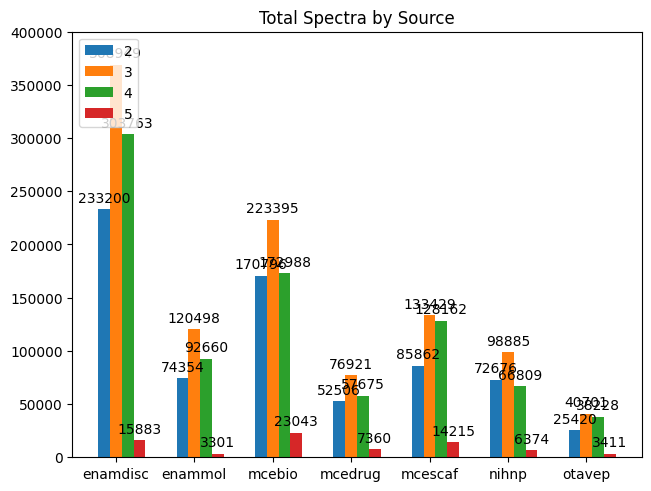

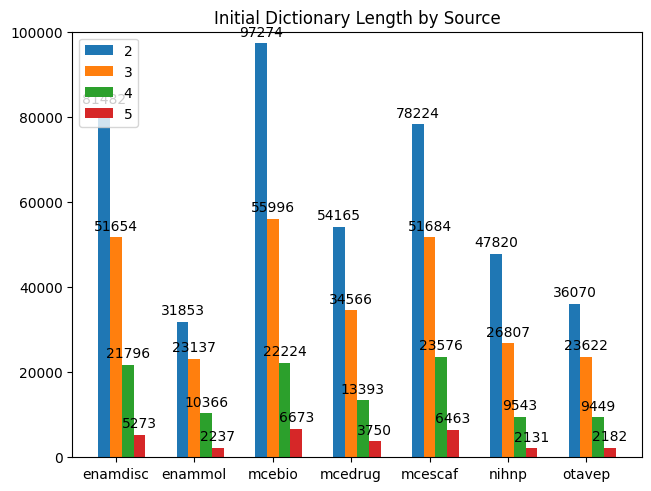

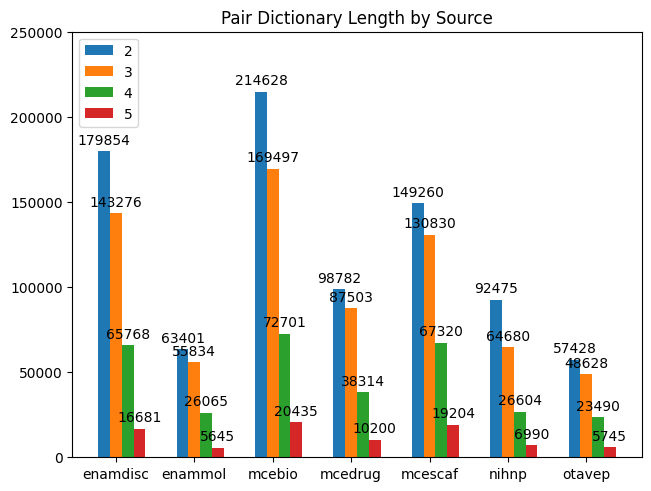

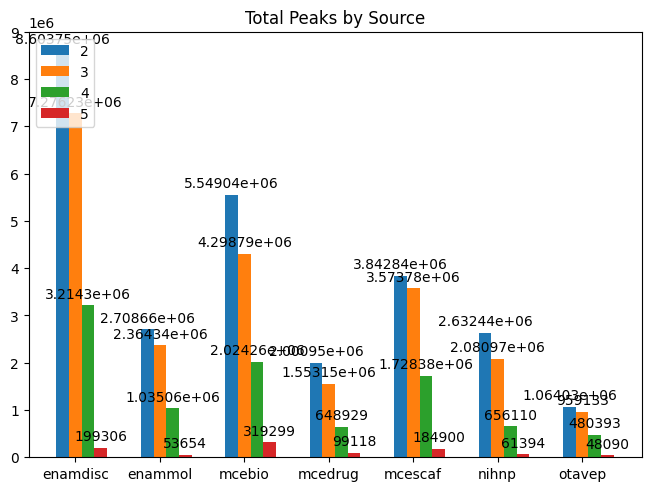

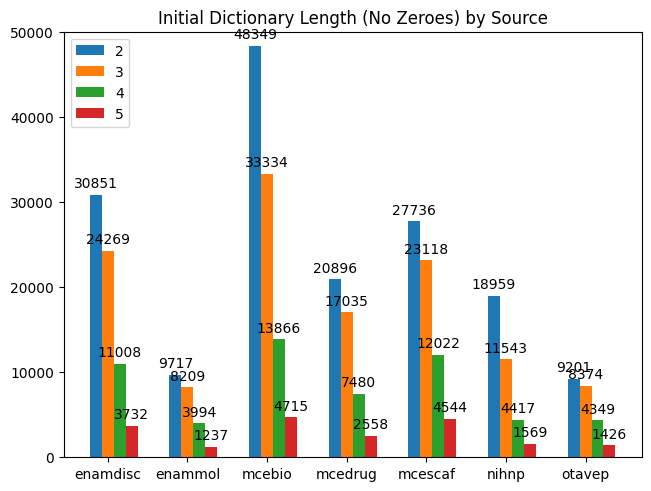

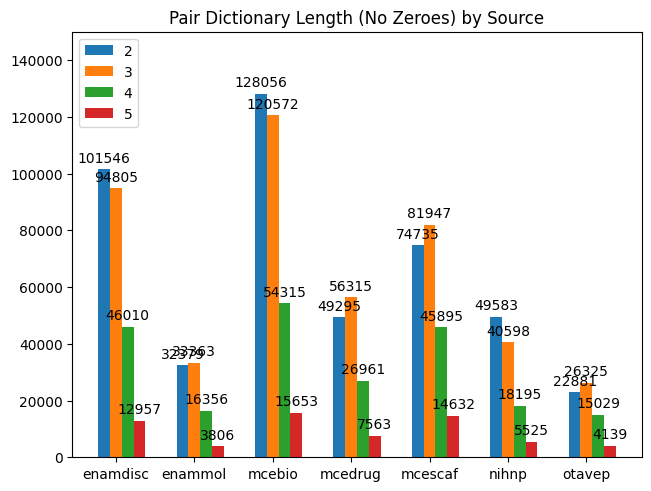

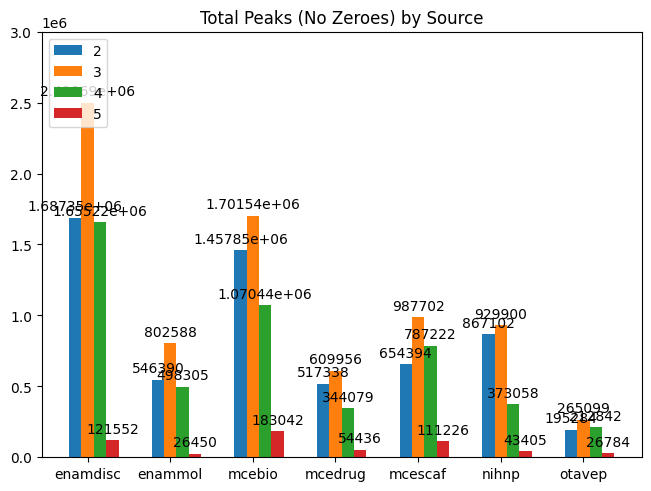

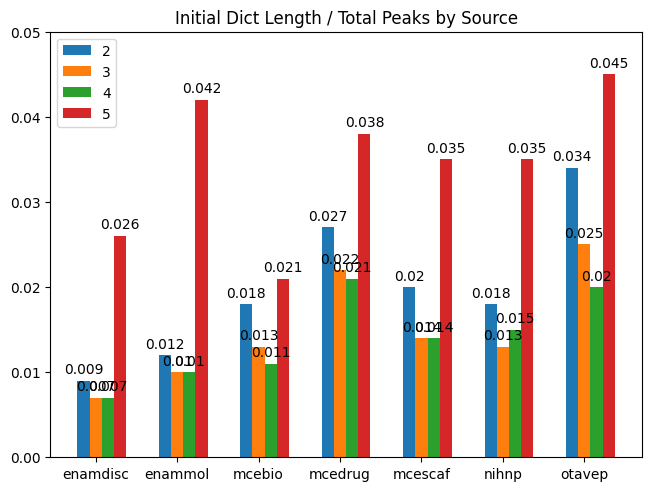

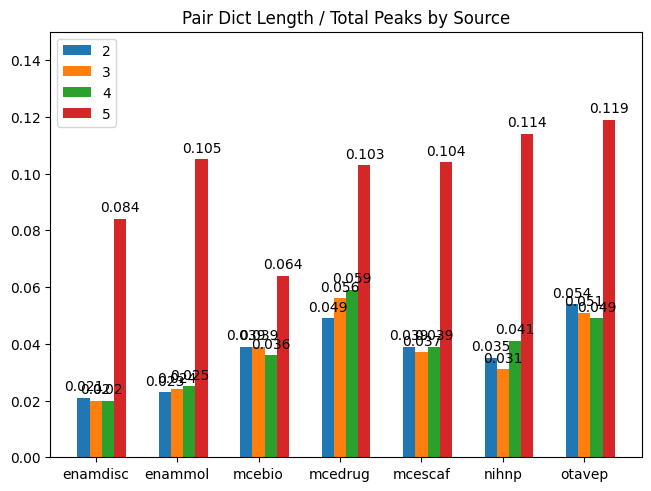

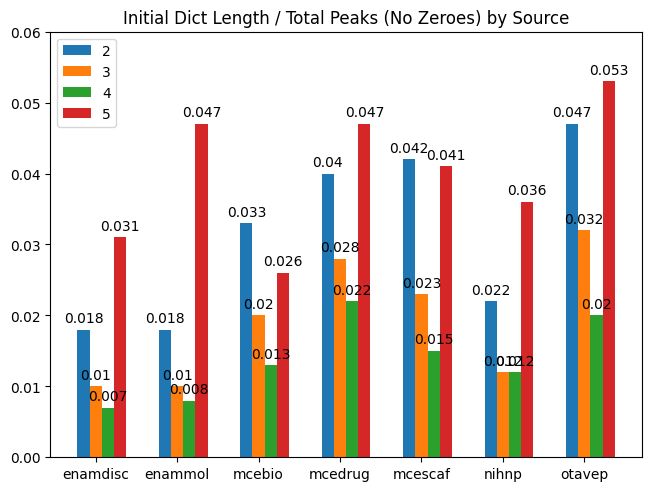

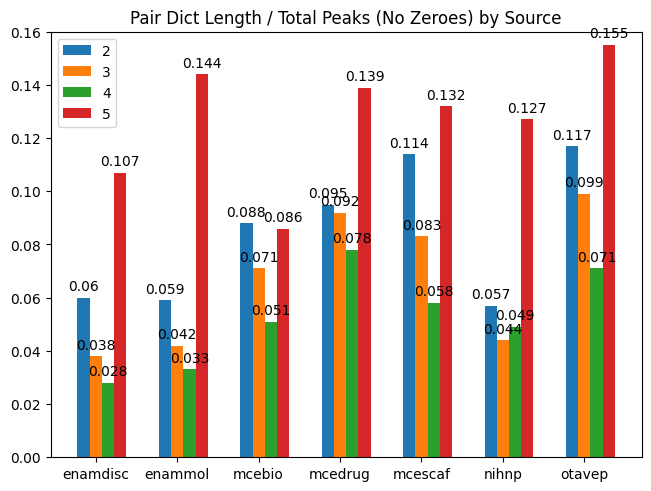

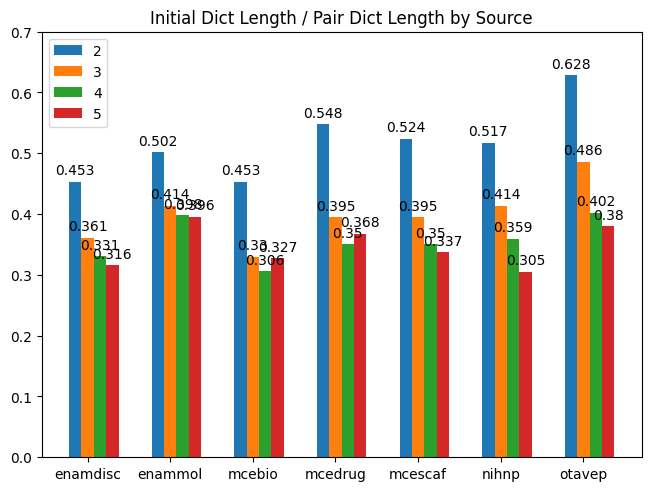

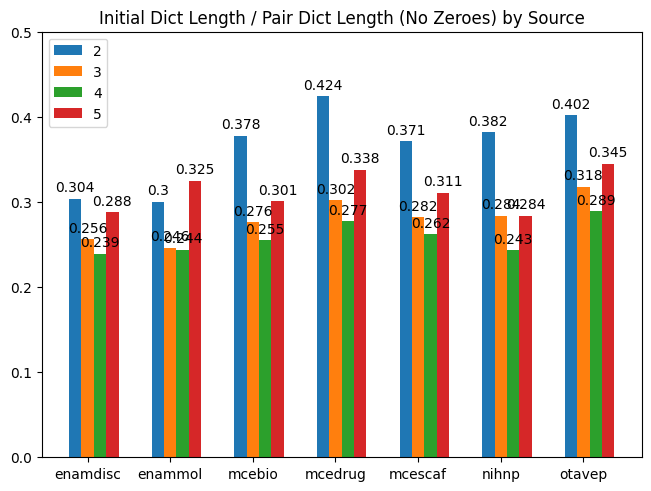

In [59]:
# Graphs

heights = {'Total Spectra' : 400000,
          'Initial Dictionary Length' : 100000,
          'Pair Dictionary Length' : 250000,
          'Total Peaks' : 9000000,
          'Initial Dictionary Length (No Zeroes)' : 50000,
          'Pair Dictionary Length (No Zeroes)' : 150000,
          'Total Peaks (No Zeroes)' : 3000000,
          'Initial Dict Length / Total Peaks' : .05,
          'Pair Dict Length / Total Peaks' : .15,
          'Initial Dict Length / Total Peaks (No Zeroes)' : .06,
          'Pair Dict Length / Total Peaks (No Zeroes)' : .16,
          'Initial Dict Length / Pair Dict Length' : .7,
          'Initial Dict Length / Pair Dict Length (No Zeroes)' : .5}

for stat in stats:
    
    temp_stats = stats_together[stat]

    x = np.arange(len(sources))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in temp_stats.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('')
    ax.set_title(stat + ' by Source')
    ax.set_xticks(x + width, sources)
    ax.legend(loc='upper left', ncols=1)
    ax.set_ylim(0, heights[stat])

    plt.show()